In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [47]:
 # Show dataset sample
dataset = pd.read_csv("dataset.csv")

# get the X data
X = dataset.iloc[:, 0:18]
X.head(5)

In [50]:
# get the y data
Y = dataset.iloc[:, 18]
Y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: CLASS, dtype: int64

#### Calculation the average empty field per data

In [51]:
# load the data in numpy format
numpy_dataset = dataset.to_numpy()

In [52]:
# get the counts of empty fields in the dataset
list_of_zero_counts = []

for data in numpy_dataset:
    counts = 0
    for d in data:
        if d == 0:
            counts += 1
    list_of_zero_counts.append(counts)

In [132]:
# get the frequency of the numbers of missing data field

freq_empty_fields = {}

for empty_field_count in list_of_zero_counts:
    if empty_field_count not in freq_empty_fields:
        freq_empty_fields[empty_field_count] = 0
    freq_empty_fields[empty_field_count] += 1


{0: 400, 1: 79, 2: 19, 3: 1, 8: 1}

<AxesSubplot:>

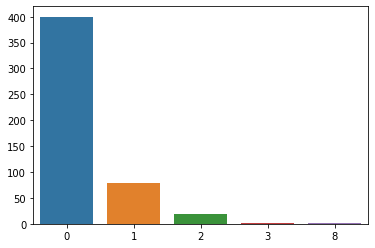

In [54]:
keys = list(freq_empty_fields.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(freq_empty_fields[k]) for k in keys]
sns.barplot(x=keys, y=vals)

In [55]:
freq_empty_fields

{0: 400, 1: 79, 2: 19, 3: 1, 8: 1}

Since the average count of empty field above indicates that a low probability of the
dataset having a missing field, this would mean that the model will have a very low
chance in learning these outlier data

#### Implement random forest classifier

In [56]:
# import train and test splitting
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [102]:
# Dimension of X and Y train
print("X train dimension:", X_train.shape)
print("Y train dimension:", X_train.shape)

X train dimension: (350, 18)
Y train dimension: (350, 18)


In [103]:
# Dimension of X and Y test
print("X test dimension:", X_test.shape)
print("Y test dimension:", X_test.shape)

X test dimension: (150, 18)
Y test dimension: (150, 18)


In [104]:
# importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [122]:
random_forest_classifier = RandomForestClassifier(random_state=4, max_depth=400,
                                                  n_estimators=400, oob_score=True)

In [123]:
# fitting the classifier
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=400, n_estimators=400, oob_score=True,
                       random_state=4)

In [124]:

# checking the out of the box score
random_forest_classifier.oob_score_

0.9142857142857143

In [125]:
# Testing the classifier on X test
y_pred = random_forest_classifier.predict(X_test)
y_pred

array([1, 3, 3, 4, 4, 1, 3, 2, 2, 2, 2, 3, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3,
       2, 1, 1, 4, 4, 3, 1, 2, 4, 1, 1, 2, 3, 2, 3, 4, 3, 2, 3, 1, 4, 2,
       1, 1, 2, 3, 4, 1, 3, 2, 3, 2, 2, 1, 3, 2, 2, 3, 4, 3, 4, 4, 3, 2,
       1, 4, 3, 1, 2, 1, 3, 4, 2, 3, 3, 1, 2, 3, 3, 2, 4, 2, 3, 3, 4, 2,
       3, 1, 2, 4, 4, 2, 2, 3, 1, 4, 1, 2, 4, 3, 1, 4, 4, 2, 1, 2, 3, 2,
       3, 1, 2, 1, 4, 4, 4, 3, 2, 2, 4, 3, 2, 3, 4, 2, 4, 2, 4, 4, 4, 2,
       3, 3, 3, 4, 4, 4, 4, 2, 2, 1, 1, 1, 4, 1, 3, 3, 2, 3], dtype=int64)

#### Show classifier performance

In [126]:
from sklearn.metrics import classification_report, accuracy_score

In [127]:
# checking the oob score
random_forest_classifier.oob_score_

0.9142857142857143

In [128]:
map_strand = {
    1: "STEM",
    2: "HUMSS",
    3: "ABM",
    4: "GAS"
}


def from_int_to_strand(strand_integers):
    y_strands = []
    for strand in strand_integers:
        y_strands.append(map_strand[strand])

    return y_strands


mapped_y_test = from_int_to_strand(y_test)
mapped_y_pred = from_int_to_strand(y_pred)

pd.crosstab(mapped_y_test, mapped_y_pred, rownames=["Actual Strands"], colnames=["Predicted Species"])

Predicted Species,ABM,GAS,HUMSS,STEM
Actual Strands,,,,
ABM,39,0,0,0
GAS,0,32,5,0
HUMSS,0,0,38,0
STEM,3,5,0,28


In [129]:
print(classification_report(mapped_y_test, mapped_y_pred))
print("Accuracy:", accuracy_score(mapped_y_test, mapped_y_pred))

              precision    recall  f1-score   support

         ABM       0.93      1.00      0.96        39
         GAS       0.86      0.86      0.86        37
       HUMSS       0.88      1.00      0.94        38
        STEM       1.00      0.78      0.88        36

    accuracy                           0.91       150
   macro avg       0.92      0.91      0.91       150
weighted avg       0.92      0.91      0.91       150

Accuracy: 0.9133333333333333


In [130]:
feature_list = list(X.columns)
feature_imp = pd.Series(random_forest_classifier.feature_importances_, index=feature_list).sort_values(ascending=False)
feature_imp

Bodily-Kinesthetic      0.127478
Intrapersonal           0.103052
Realistic               0.097211
ENG                     0.083910
Investigate             0.075835
Linguistic              0.069699
Musical                 0.055448
Logical-mathematical    0.051050
Artistic                0.048286
Interpersonal           0.043022
Spatial                 0.040044
SOC-SCI                 0.034792
MATH                    0.031953
Naturalistic            0.031496
Social                  0.031466
Enterprising            0.031274
SCI                     0.025058
Conventional            0.018926
dtype: float64

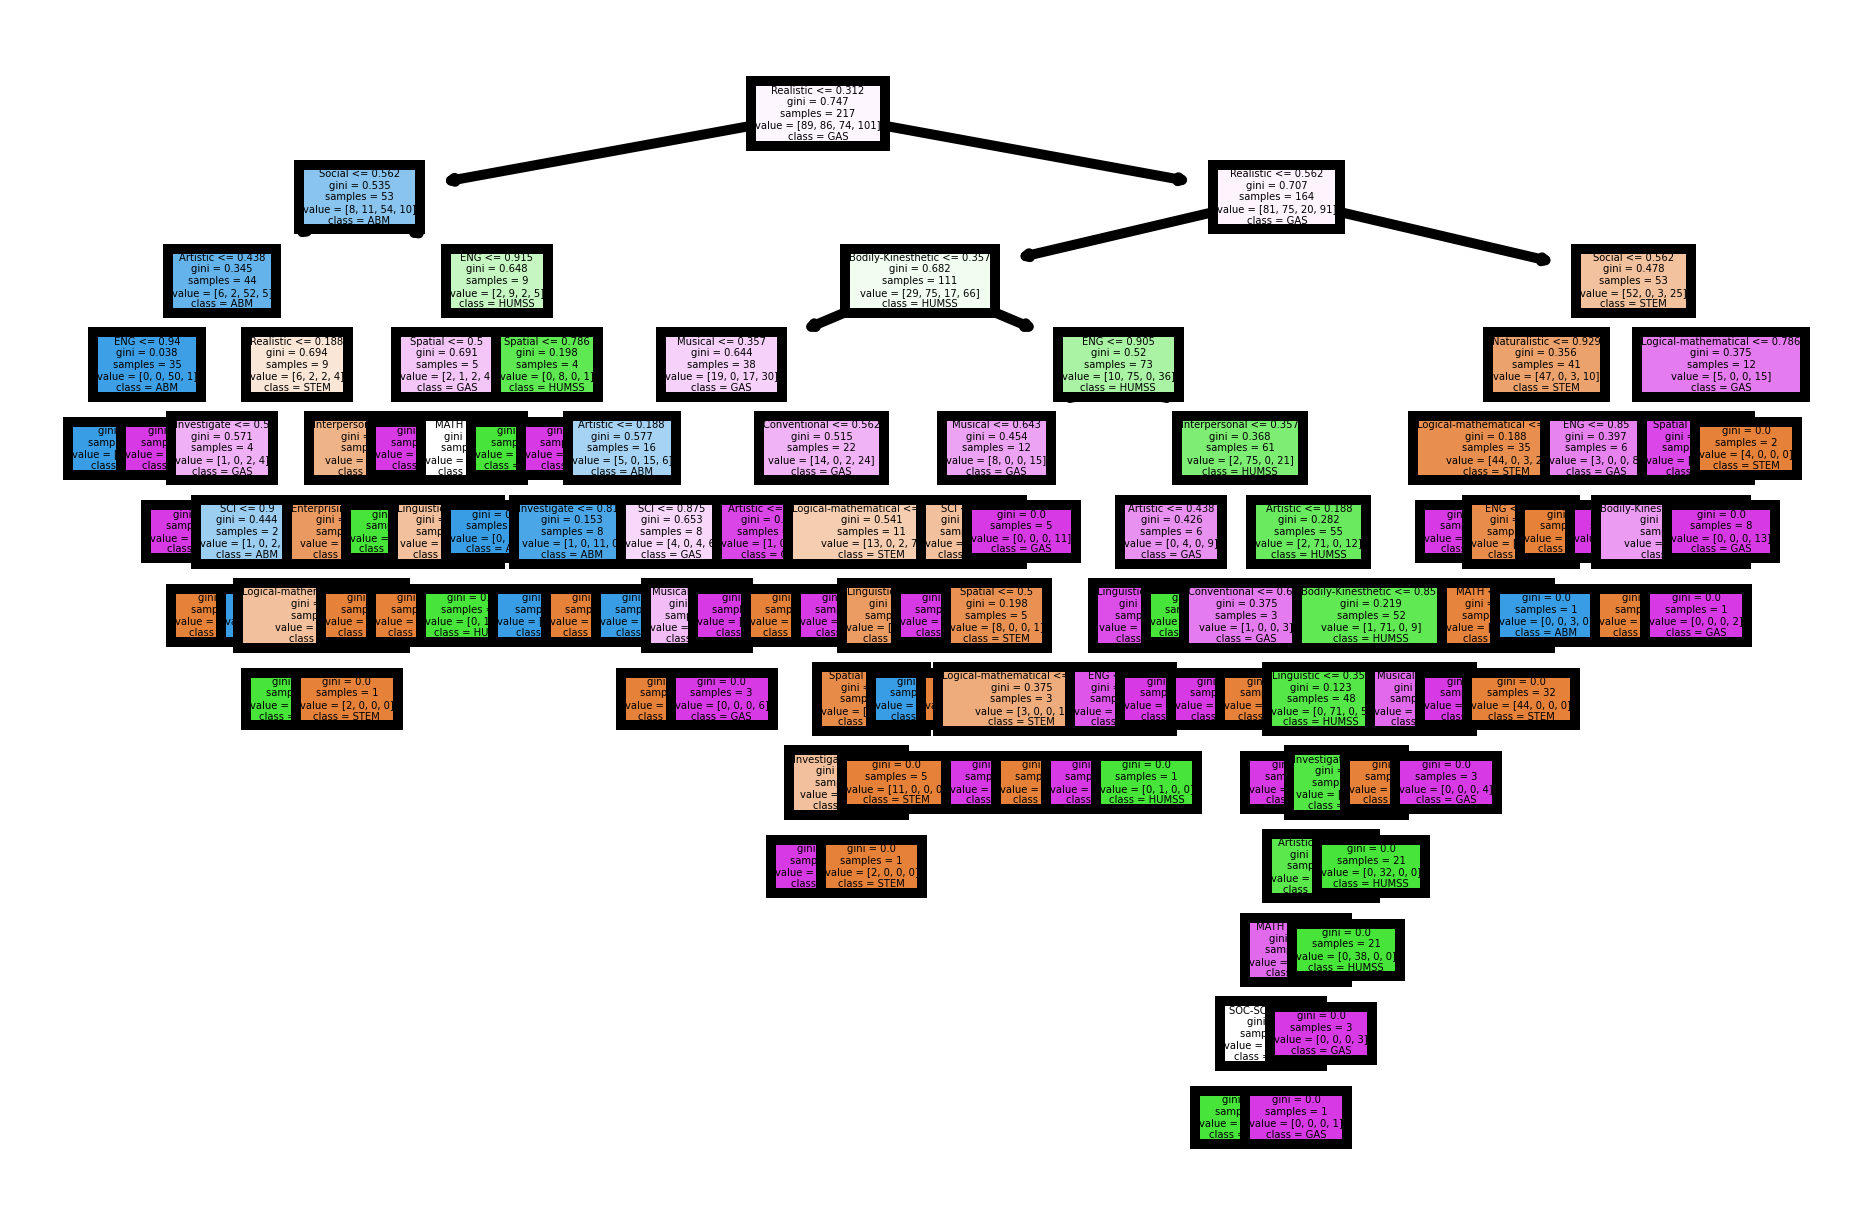

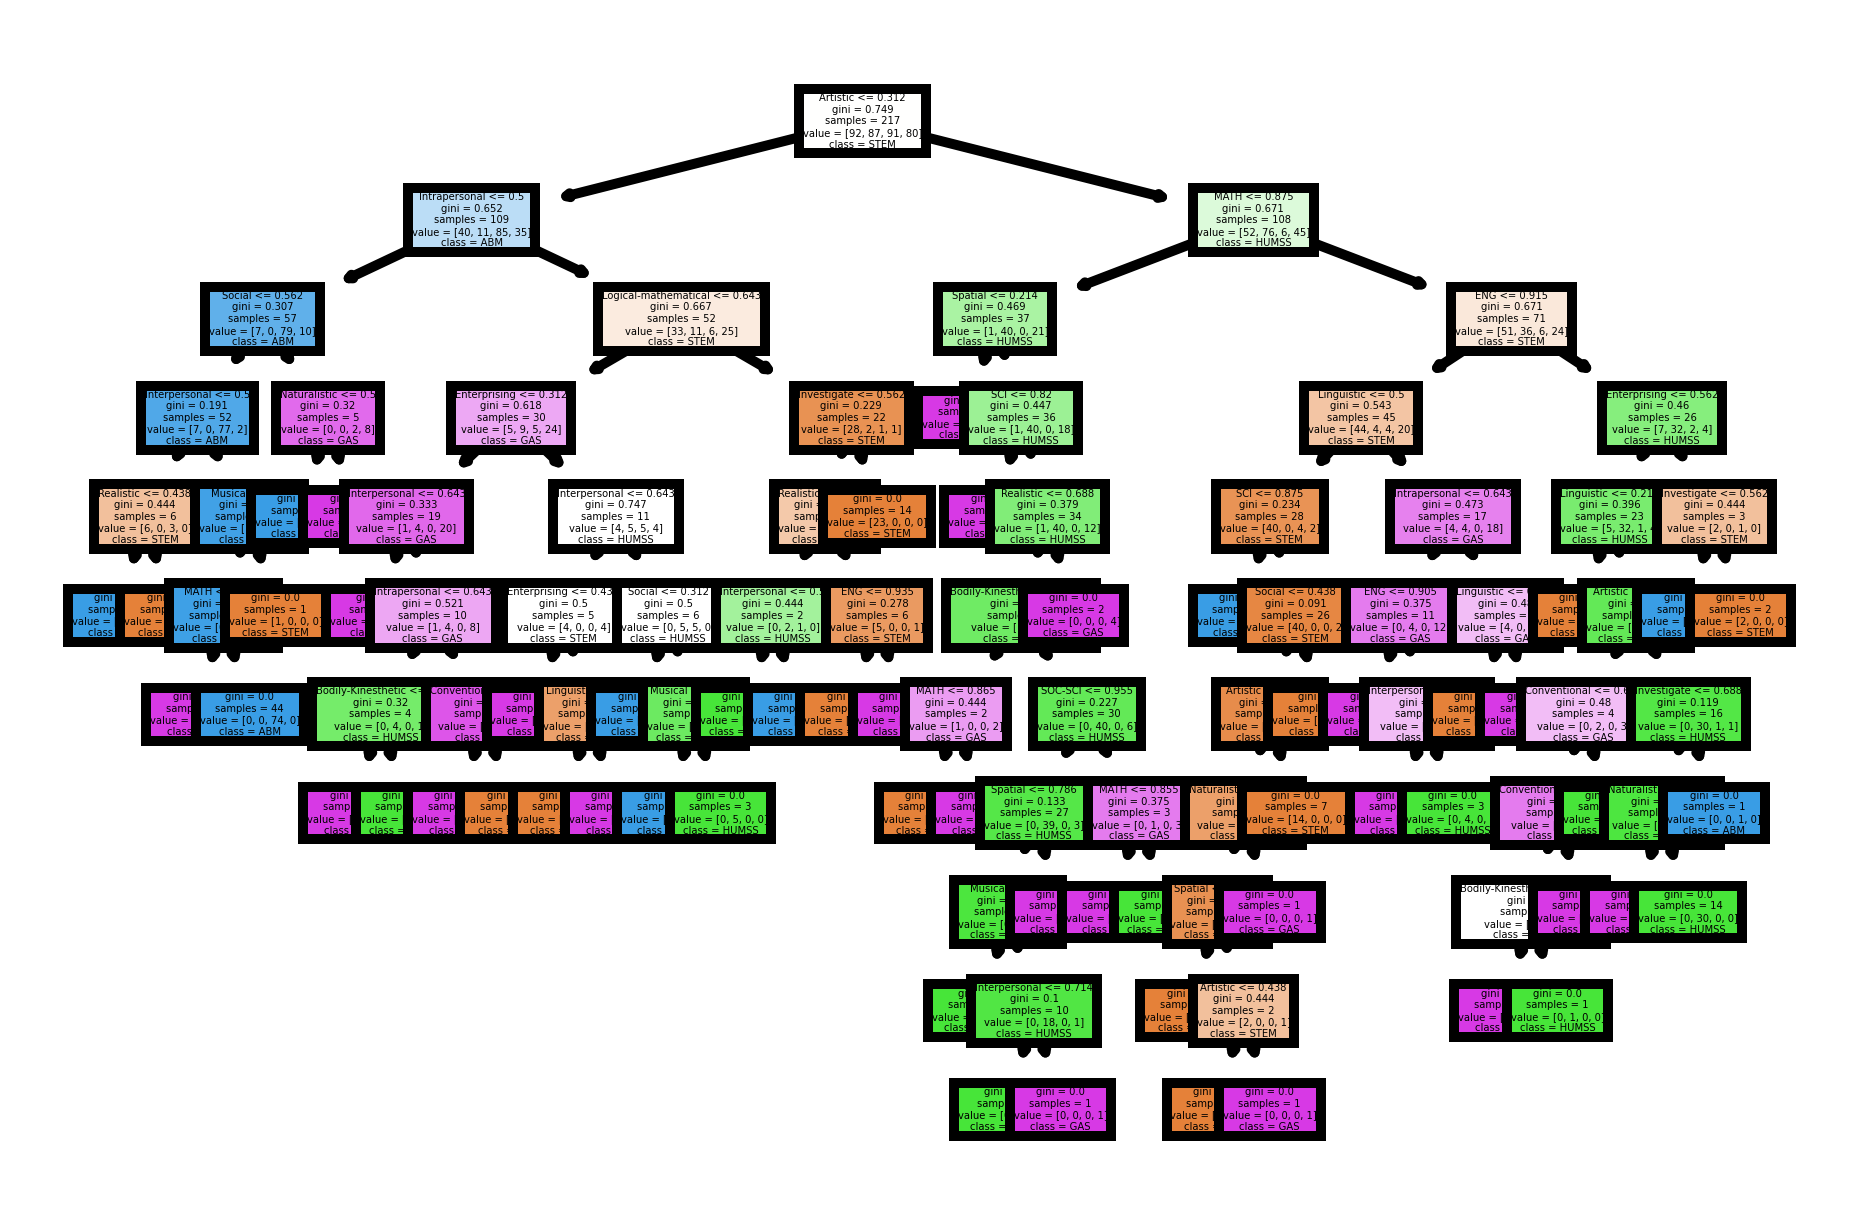

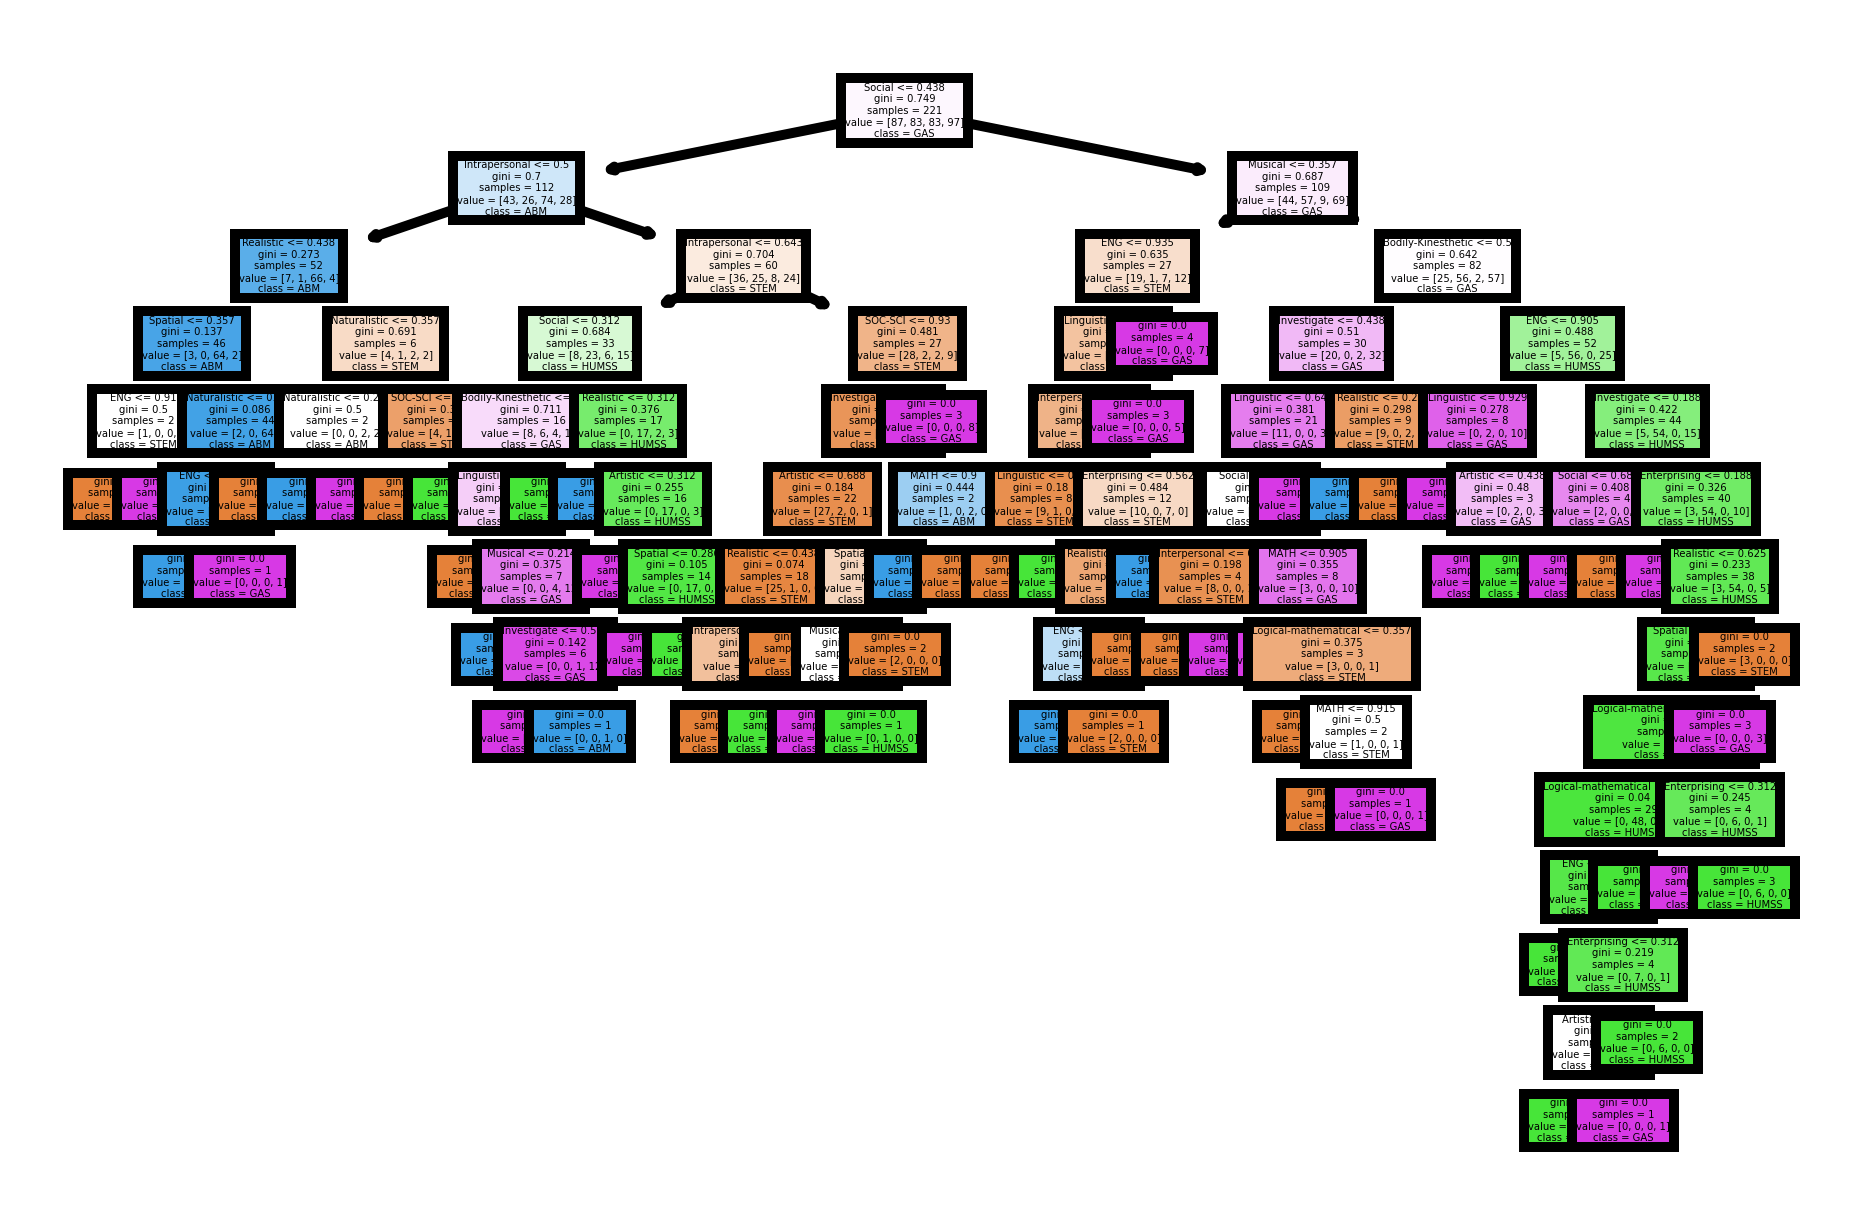

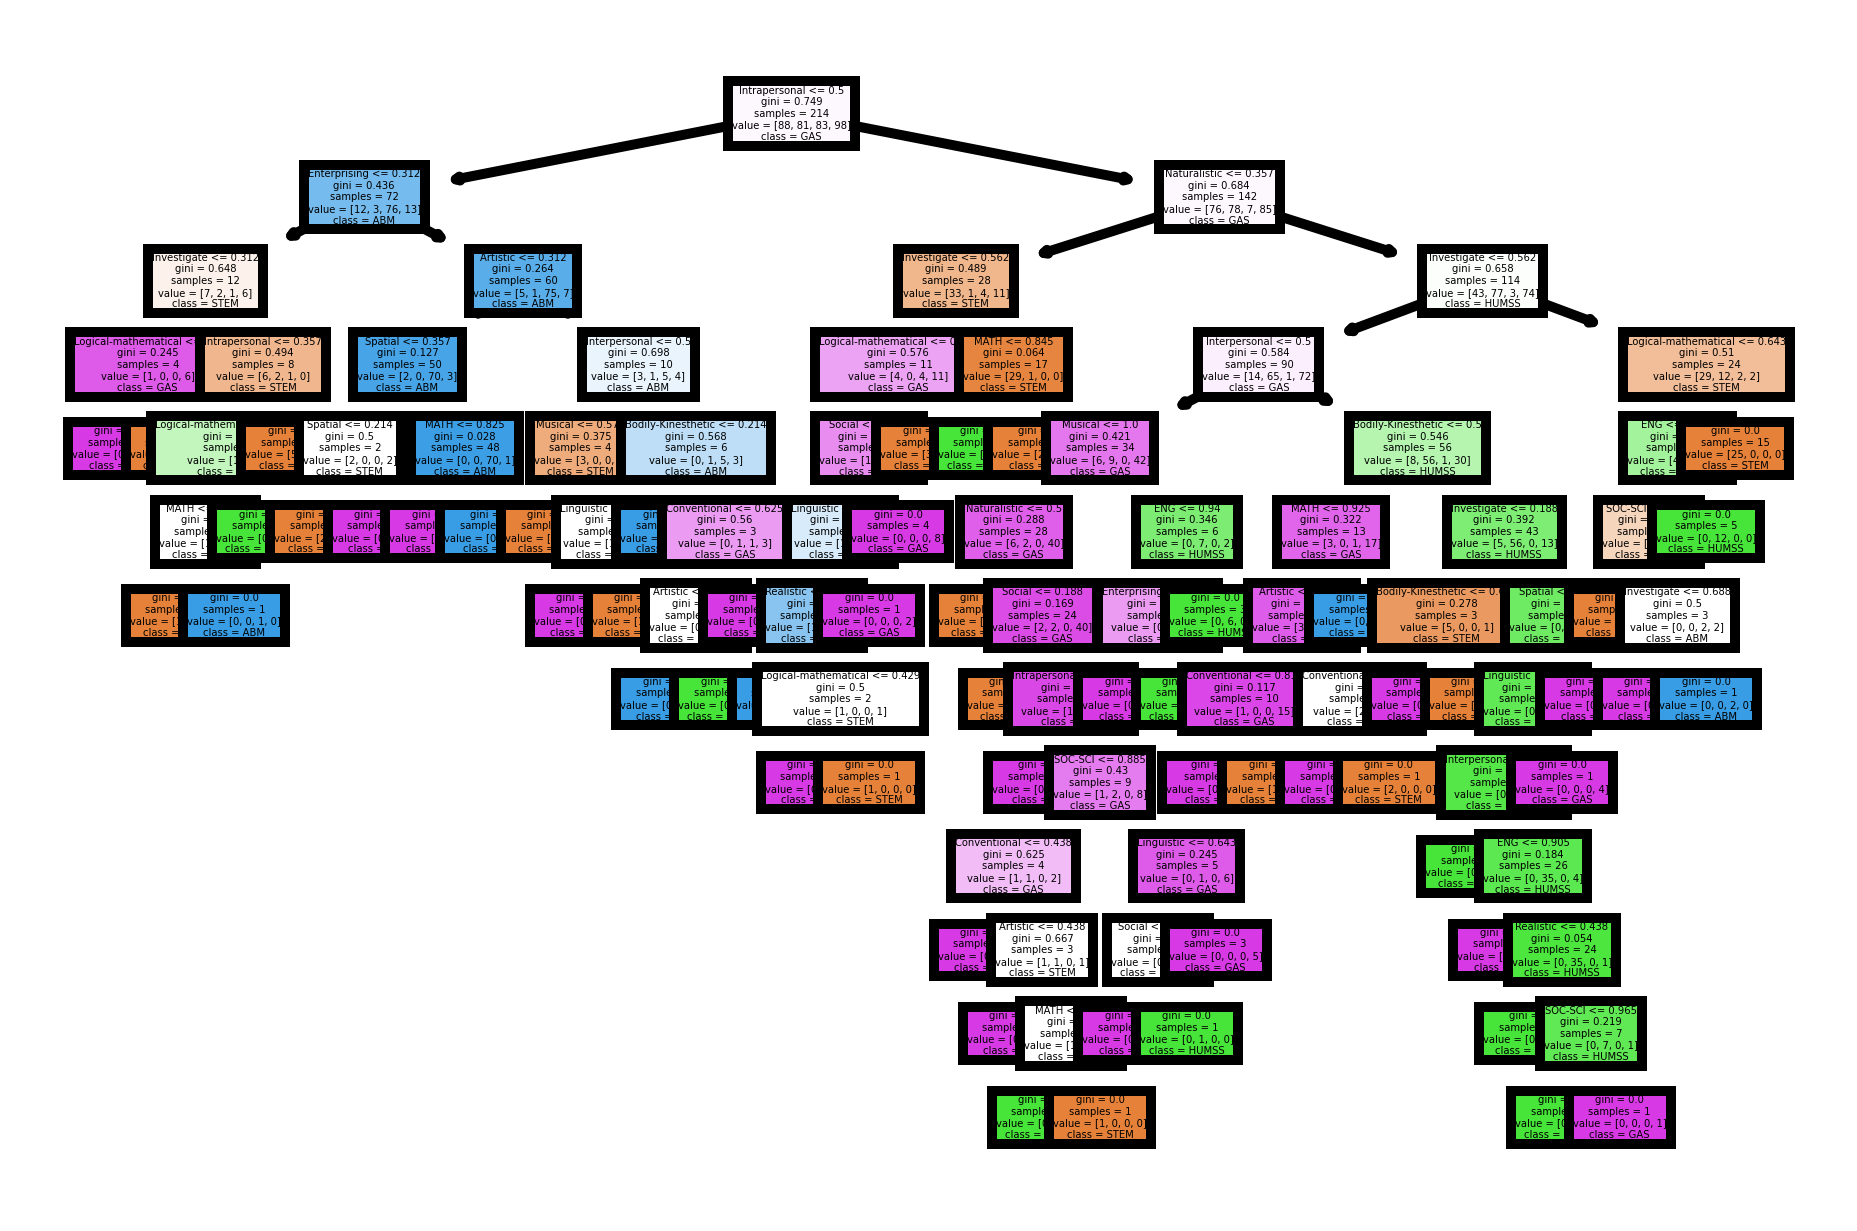

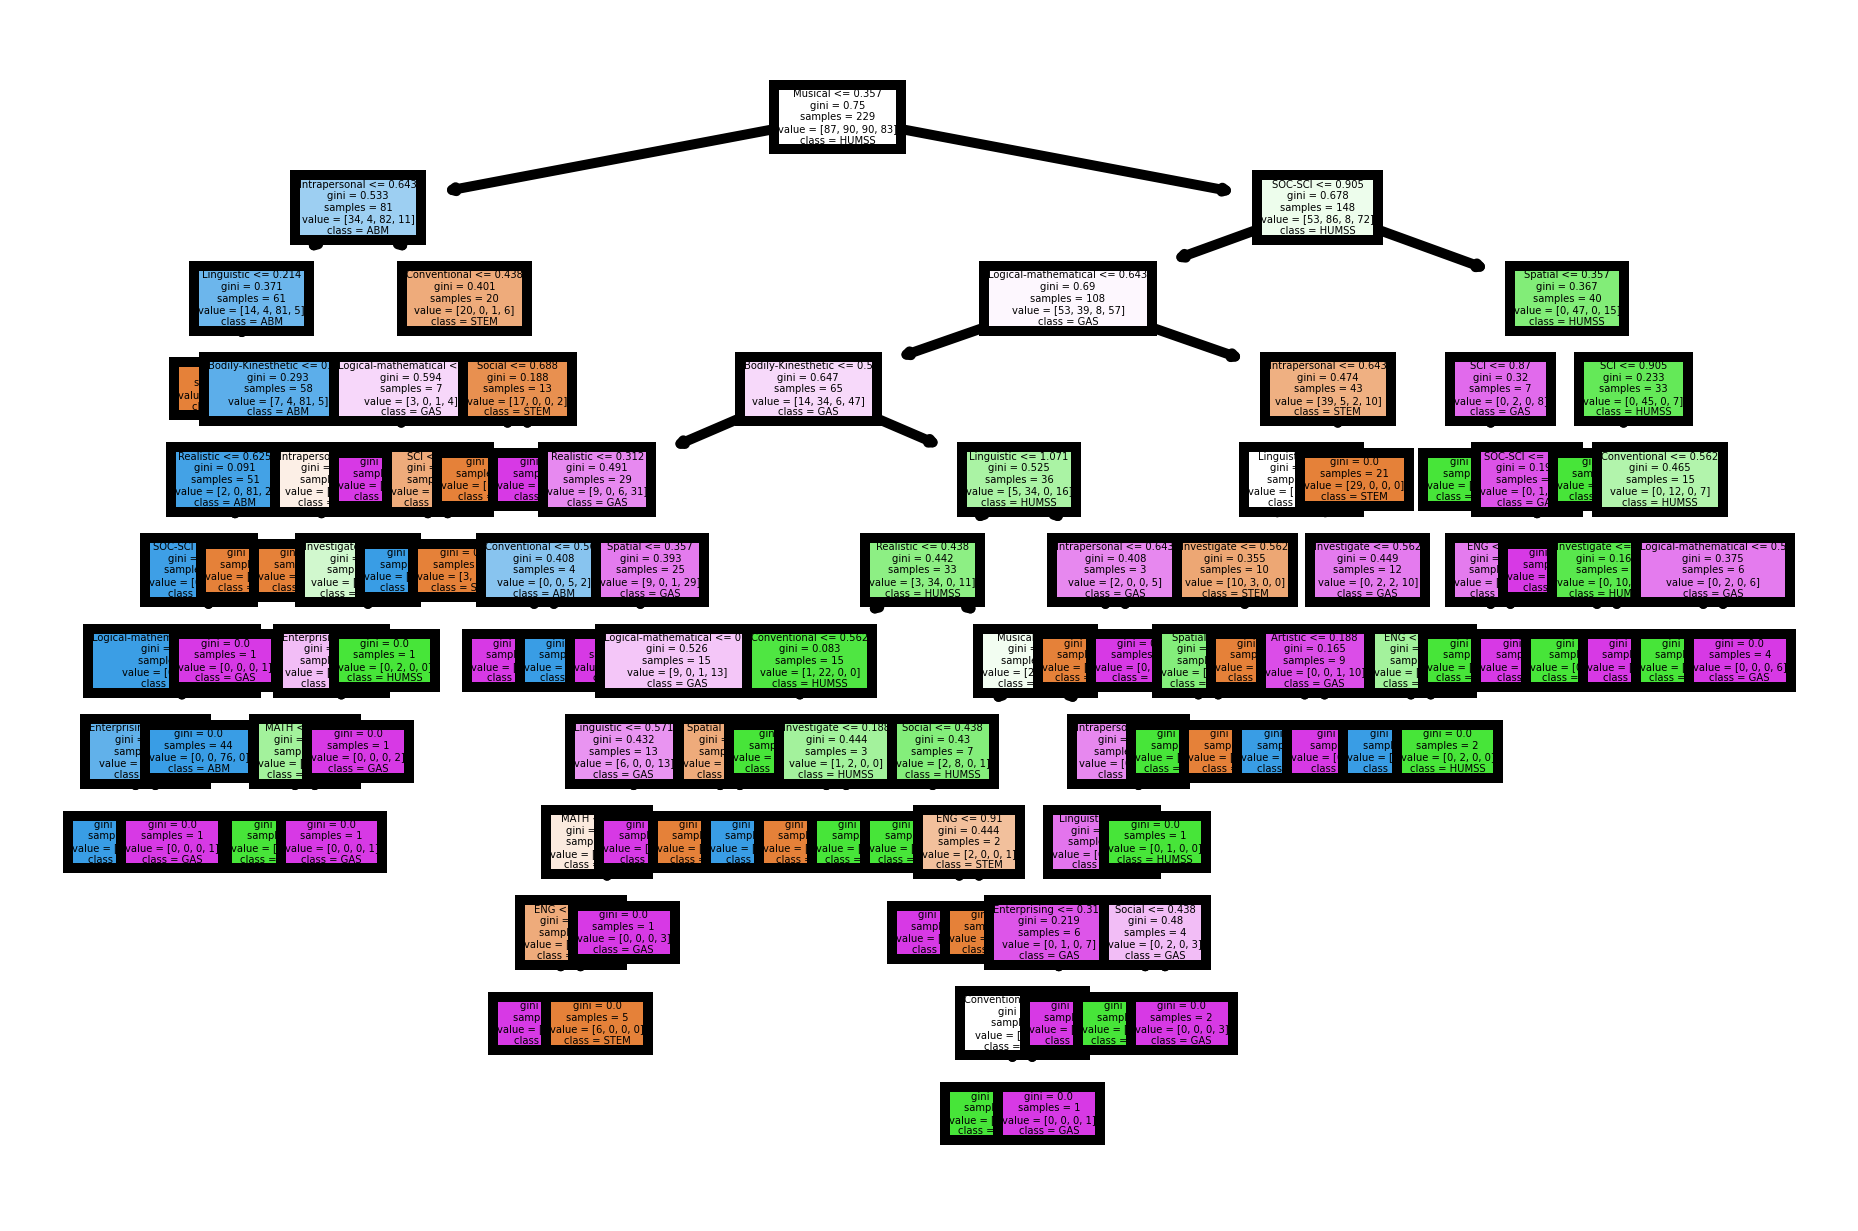

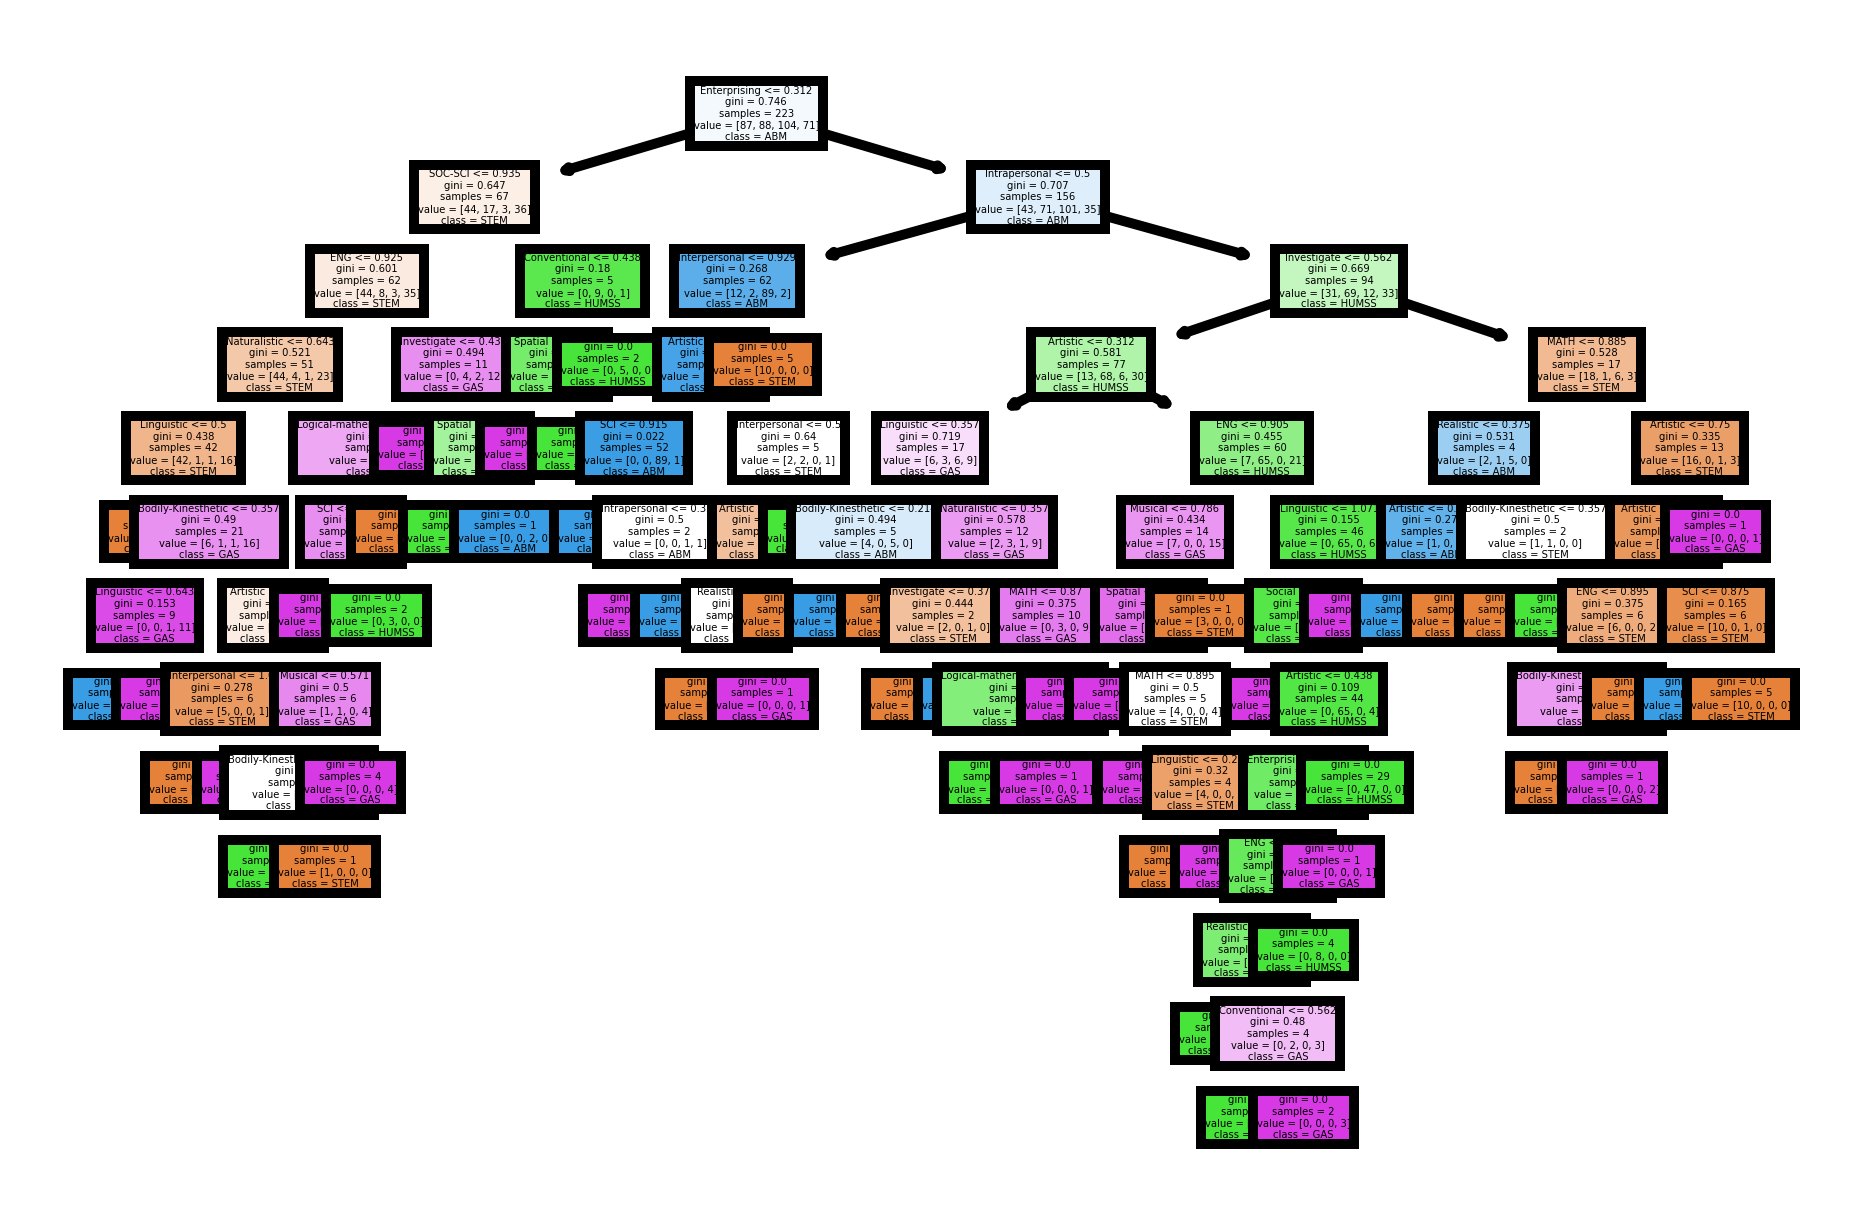

In [131]:
from sklearn import tree

fn = np.array(dataset.columns[:-1])
cn = ["STEM", "HUMSS", "ABM", "GAS"]

for i in range(6):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 2), dpi=720)
    tree.plot_tree(random_forest_classifier.estimators_[i],
                   feature_names=fn,
                   class_names=cn,
                   filled=True);
    fig.savefig(f'tree{i}.png')

In [62]:
a = X_train.sample()
print(a)

     Realistic  Investigate  Artistic  Social  Enterprising  Conventional  \
356          2            4         1       2             3             4   

     Linguistic  Logical-mathematical  Spatial  Bodily-Kinesthetic  Musical  \
356           4                     3        3                   1        2   

     Interpersonal  Intrapersonal  Naturalistic  MATH  ENG  SCI  SOC-SCI  
356              4              2             1    92   88   86       90  
